This notebook demonstrates the use of the package for event detection, magnitude estimation, phase arrival-time picking and polarity estimation, and saving the result as a csv file.

In [1]:
import os
import sys
sys.path.insert(0, '..')
import torch
import obspy
from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from saipy.data.realdata import *
from saipy.utils.packagetools import *

/home/seismoai/data/chakraborty/DeepSeis_venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### $(\mathrm{i})$ Specifying waveform details

In [2]:
wsp = 'IRIS'
network =  'BC'
station =  'VTX'
location = '*'
channel = "HH*"
start_time = UTCDateTime("2023-07-18T11:20:00")
end_time = UTCDateTime("2023-07-18T12:10:00")

### $(\mathrm{ii})$ Monitoring continuous data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3 Trace(s) in Stream:
BC.VTX..HHE | 2023-07-18T11:20:00.000000Z - 2023-07-18T12:10:00.000000Z | 100.0 Hz, 300001 samples
BC.VTX..HHN | 2023-07-18T11:20:00.000000Z - 2023-07-18T12:10:00.000000Z | 100.0 Hz, 300001 samples
BC.VTX..HHZ | 2023-07-18T11:20:00.000000Z - 2023-07-18T12:10:00.000000Z | 100.0 Hz, 300001 samples
Pre-processing data...
3 Trace(s) in Stream:
BC.VTX..HHE | 2023-07-18T11:20:00.000000Z - 2023-07-18T12:10:00.000000Z | 100.0 Hz, 300001 samples
BC.VTX..HHN | 2023-07-18T11:20:00.000000Z - 2023-07-18T12:10:00.000000Z | 100.0 Hz, 300001 samples
BC.VTX..HHZ | 2023-07-18T11:20:00.000000Z - 2023-07-18T12:10:00.000000Z | 100.0 Hz, 300001 samples


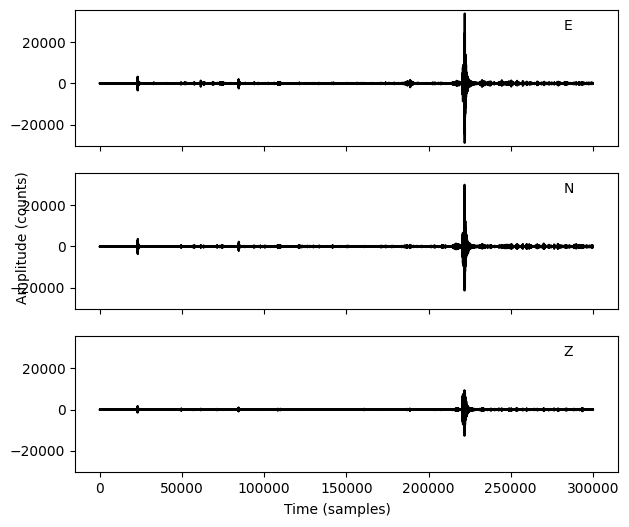

Monitoring...


2023-08-17 15:14:33.603593: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
%load_ext autoreload
%autoreload 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

monitor1(wsp, network, station, location, channel, start_time, end_time, device, leng_win=30, save_result=True, 
        path='./saving_results', file_name='result_Baja_California.csv')